In [105]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [106]:
import yfinance as yf
start_date = '2012-01-01'
end_date = '2023-07-18'
df = yf.download('AAPL', start=start_date, end=end_date)
print(df)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.482927   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.550012   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.689340   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.821993   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.801653   
...                ...         ...         ...         ...         ...   
2023-07-11  189.160004  189.300003  186.600006  188.080002  188.080002   
2023-07-12  189.679993  191.699997  188.470001  189.770004  189.770004   
2023-07-13  190.500000  191.190002  189.779999  190.539993  190.539993   
2023-07-14  190.229996  191.179993  189.630005  190.690002  190.690002   
2023-07-17  191.899994  194.320007  191.809

In [108]:
df.shape

(2902, 6)

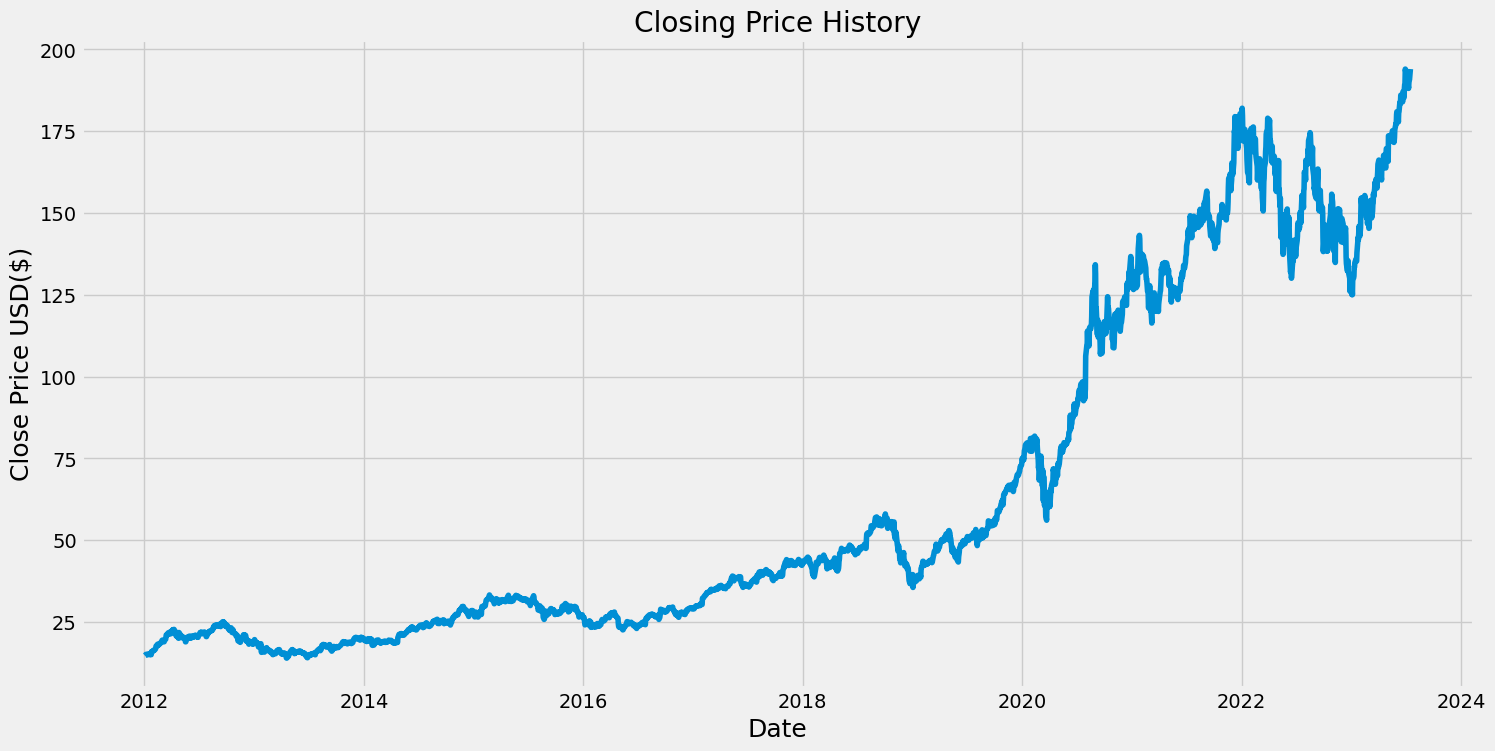

In [109]:
#Visulation closing price history
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [110]:
#Create a new dataframe with only the " Close Column"
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*0.8)

training_data_len

2322

In [111]:
#Scale the Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00410617],
       [0.00454456],
       [0.00545506],
       ...,
       [0.98083779],
       [0.98167098],
       [1.        ]])

In [112]:
#Create traing data set
#Crdeate scaled traing dataset
train_data=scaled_data[0:training_data_len,:]
#Split the Data into X_train and Y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()




[array([0.00410617, 0.00454456, 0.00545506, 0.00632192, 0.00618901,
       0.00648854, 0.00635167, 0.00612157, 0.00580815, 0.00677816,
       0.00765296, 0.00738318, 0.00590535, 0.00731573, 0.00592717,
       0.01113427, 0.01073159, 0.01125726, 0.0123939 , 0.01308222,
       0.0130247 , 0.01281245, 0.013717  , 0.01456798, 0.01553205,
       0.01708922, 0.02036027, 0.02040986, 0.02223086, 0.02359165,
       0.02125292, 0.0221535 , 0.02213565, 0.02466085, 0.0243018 ,
       0.02496632, 0.02616048, 0.02682502, 0.02873925, 0.03013375,
       0.03053643, 0.03067728, 0.02829293, 0.02771766, 0.02780296,
       0.0300445 , 0.0306753 , 0.03203014, 0.03522382, 0.03948472,
       0.03868729, 0.03868927, 0.0417699 , 0.04273396, 0.04204761,
       0.04142078, 0.04076815, 0.04293628, 0.04442404, 0.0450469 ])]
[0.04350758058300769]

[array([0.00410617, 0.00454456, 0.00545506, 0.00632192, 0.00618901,
       0.00648854, 0.00635167, 0.00612157, 0.00580815, 0.00677816,
       0.00765296, 0.00738318, 0.00

In [113]:
#Convert X_train and Y_train in to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [114]:
#Reashape the data
x_train=np.reshape(x_train,(x_train.shape[0],60,1))
x_train.shape

(2262, 60, 1)

In [115]:
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [116]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [149]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
2262/2262 [==============================] - 69s 30ms/step - loss: 8.1633e-05
Epoch 2/10
2262/2262 [==============================] - 71s 31ms/step - loss: 7.3546e-05
Epoch 3/10
2262/2262 [==============================] - 68s 30ms/step - loss: 8.3650e-05
Epoch 4/10
2262/2262 [==============================] - 69s 30ms/step - loss: 7.4677e-05
Epoch 5/10
2262/2262 [==============================] - 71s 31ms/step - loss: 7.5712e-05
Epoch 6/10
2262/2262 [==============================] - 68s 30ms/step - loss: 7.5528e-05
Epoch 7/10
2262/2262 [==============================] - 70s 31ms/step - loss: 7.1017e-05
Epoch 8/10
2262/2262 [==============================] - 70s 31ms/step - loss: 7.1493e-05
Epoch 9/10
2262/2262 [==============================] - 68s 30ms/step - loss: 7.6342e-05
Epoch 10/10
2262/2262 [==============================] - 70s 31ms/step - loss: 6.5203e-05


In [150]:
#Create the testing data set
#Create a new array containing scaled value from index 2322 to 2902
test_data=scaled_data[training_data_len-60:,:1]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [151]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [152]:
#Reshape the data to numpy array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [153]:
#Get the model predicted price value
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 [==============================] - 0s 17ms/step


In [154]:
#Get the RMSE error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

13.309204772423053

<ipython-input-155-dfe273412a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


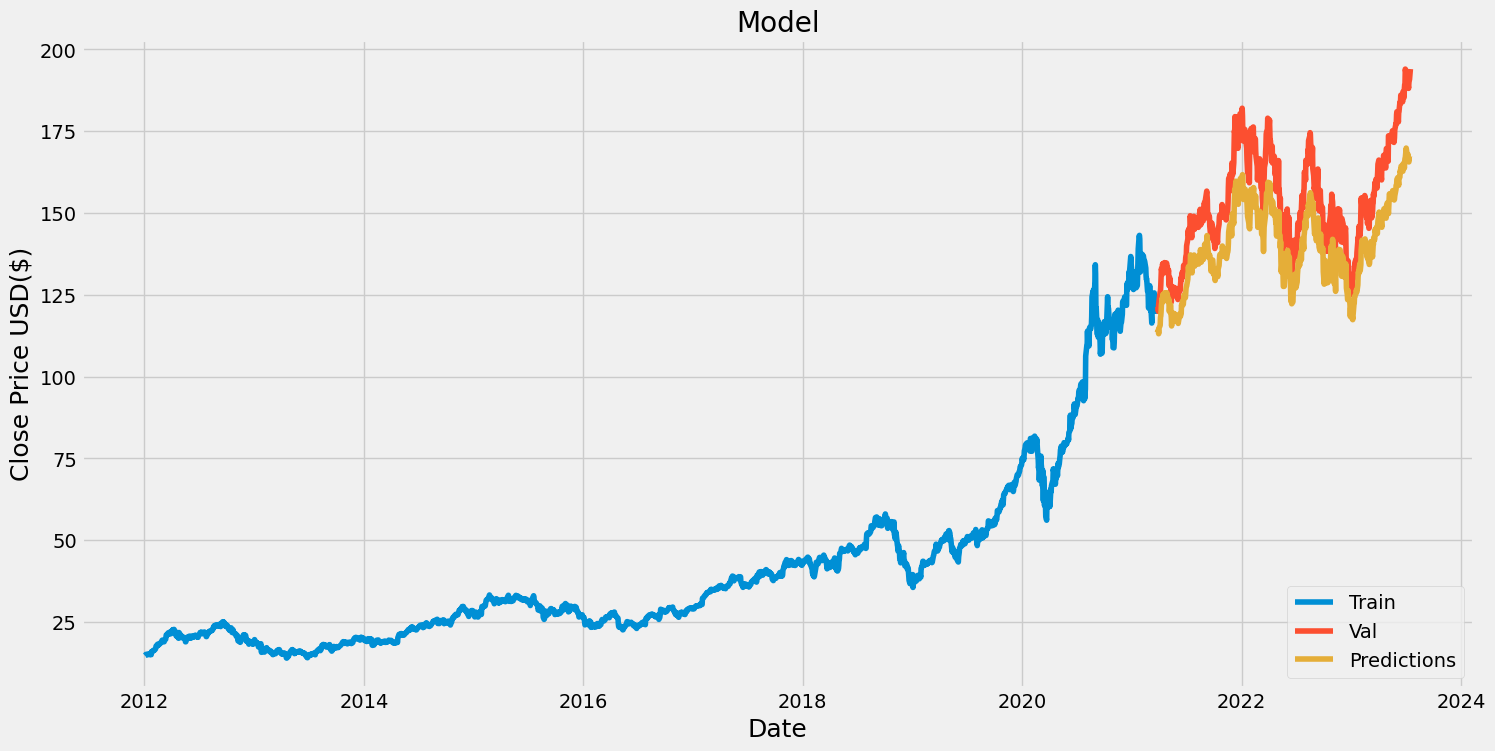

In [155]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [156]:
#Show the valid and Predicted price
valid

,Close,Predictions
Date,,
2021-03-26,121.209999,113.399704
2021-03-29,121.389999,114.015450
2021-03-30,119.900002,114.310722
2021-03-31,122.150002,113.087433
2021-04-01,123.000000,114.750458
...,...,...
2023-07-11,188.080002,165.907150
2023-07-12,189.770004,165.597504
2023-07-13,190.539993,166.941711


In [157]:
import yfinance as yf

# Get the quote
apple_quote = yf.download('AAPL', start='2023-04-05', end='2023-04-10')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
x_test = []

# Append the past 60 days
x_test.append(last_60_days_scaled)

# Convert the x_test data set to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(x_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 23ms/step
[[152.0593]]


In [158]:
import yfinance as yf

# Get the quote for a range of dates
apple_quote2 = yf.download('AAPL', start='2023-04-05', end='2023-04-10')

# Print the closing prices
print(apple_quote2['Close'])


[*********************100%***********************]  1 of 1 completed
Date
2023-04-05    163.759995
2023-04-06    164.660004
Name: Close, dtype: float64
